In [49]:
#importing the required libraries/dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#reading the data
datafile = '/content/Questionnaire_ Prevalence of Malaria in Pregnancy.csv'
dataframe=pd.read_csv(datafile)

Exploring, cleaning and preprocessing

In [51]:
#find number of rows and columns
dataframe.shape

(1646, 16)

In [52]:
#get the first 5 rows
dataframe.head()

,Age,Gravida,Gestational Age (Months),Have you had malaria in the past?,Do you live in an area where mosquitoes are commonly found?,Mild fever,Body aches/Fatigues,Cold/chills,Difficulty in breathing,High fever,Profuse sweating,Vomiting,Severe headache,Severe chills/shivering,How often do you receive treatment for malaria,Result of malaria test
0,25,1,2,0,1,0,1,0,1,0,0,0,0,0,0,Positive-Severe
1,23,1,3,2,0,0,1,0,1,0,0,0,0,0,0,Negative
2,25,1,3,1,0,0,1,0,1,0,0,0,0,0,0,Positive-Uncomplicated
3,30,1,2,1,0,0,1,0,1,0,0,0,0,0,1,Negative
4,34,1,3,1,1,0,1,0,1,0,0,0,0,0,0,Positive-Uncomplicated


In [53]:
#list of column names
dataframe.columns

Index(['Age', 'Gravida', 'Gestational Age (Months)',
       'Have you had malaria in the past?',
       'Do you live in an area where mosquitoes are commonly found?',
       'Mild fever', 'Body aches/Fatigues', 'Cold/chills',
       'Difficulty in breathing', 'High fever', 'Profuse sweating', 'Vomiting',
       'Severe headache', 'Severe chills/shivering',
       'How often do you receive treatment for malaria',
       'Result of malaria test'],
      dtype='object')

In [54]:
#obtain some information
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 16 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Age                                                          1646 non-null   int64 
 1   Gravida                                                      1646 non-null   int64 
 2   Gestational Age (Months)                                     1646 non-null   int64 
 3   Have you had malaria in the past?                            1646 non-null   int64 
 4   Do you live in an area where mosquitoes are commonly found?  1646 non-null   int64 
 5   Mild fever                                                   1646 non-null   int64 
 6   Body aches/Fatigues                                          1646 non-null   int64 
 7   Cold/chills                                                  1646 non-null   int64 
 8 

In [55]:
#getting different outcomes or results in the dataset
dataframe['Result of malaria test'].unique()

array(['Positive-Severe', 'Negative', 'Positive-Uncomplicated'],
      dtype=object)

In [56]:
labels=pd.Categorical(dataframe['Result of malaria test'])
labels

['Positive-Severe', 'Negative', 'Positive-Uncomplicated', 'Negative', 'Positive-Uncomplicated', ..., 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
Length: 1646
Categories (3, object): ['Negative', 'Positive-Severe', 'Positive-Uncomplicated']

In [57]:
#getting the first rows
dataframe.head()

,Age,Gravida,Gestational Age (Months),Have you had malaria in the past?,Do you live in an area where mosquitoes are commonly found?,Mild fever,Body aches/Fatigues,Cold/chills,Difficulty in breathing,High fever,Profuse sweating,Vomiting,Severe headache,Severe chills/shivering,How often do you receive treatment for malaria,Result of malaria test
0,25,1,2,0,1,0,1,0,1,0,0,0,0,0,0,Positive-Severe
1,23,1,3,2,0,0,1,0,1,0,0,0,0,0,0,Negative
2,25,1,3,1,0,0,1,0,1,0,0,0,0,0,0,Positive-Uncomplicated
3,30,1,2,1,0,0,1,0,1,0,0,0,0,0,1,Negative
4,34,1,3,1,1,0,1,0,1,0,0,0,0,0,0,Positive-Uncomplicated


In [58]:
#class distribution
dataframe['Result of malaria test'].value_counts()

,count
Result of malaria test,
Positive-Uncomplicated,652
Negative,585
Positive-Severe,409


<Axes: xlabel='Result of malaria test'>

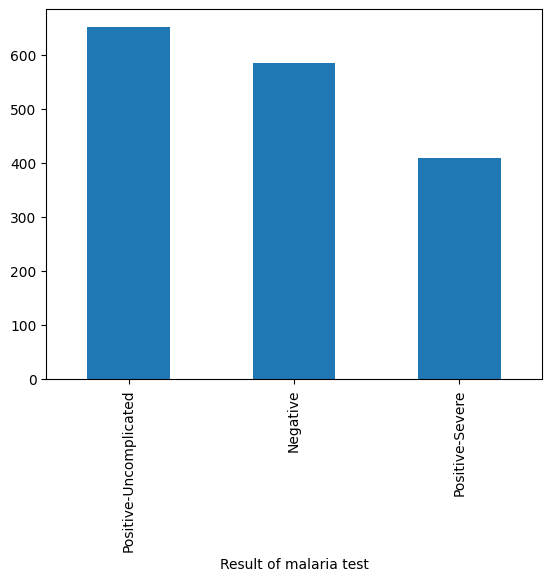

In [59]:
#plot a bar chart to see class distribution
dataframe['Result of malaria test'].value_counts().plot.bar()

In [60]:
#descriptive statistics of the data
dataframe.iloc[:,:16].describe()

,Age,Gravida,Gestational Age (Months),Have you had malaria in the past?,Do you live in an area where mosquitoes are commonly found?,Mild fever,Body aches/Fatigues,Cold/chills,Difficulty in breathing,High fever,Profuse sweating,Vomiting,Severe headache,Severe chills/shivering,How often do you receive treatment for malaria
count,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000
mean,30.832321,4.567436,3.249696,0.801944,0.542527,0.453220,0.491495,0.433171,0.388821,0.405225,0.349939,0.386391,0.363913,0.380923,1.034022
std,9.965403,2.785985,2.242770,0.711791,0.498340,0.497958,0.500080,0.495664,0.487631,0.491085,0.477095,0.487070,0.481270,0.485761,0.802009
min,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,50.000000,10.000000,32.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


Data Preprocessing

In [61]:
#separate the labels/classes from the features/measurements
x = dataframe.drop(columns = 'Result of malaria test', axis = 1)
y = dataframe['Result of malaria test']

In [62]:
x.shape


(1646, 15)

In [63]:
y.shape

(1646,)

In [64]:
#encode the labels

In [65]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(y)
yencoded=labelencoder.transform(y)

In [66]:
yencoded[0:5]

array([1, 0, 2, 0, 2])

In [67]:
y[0:5]

,Result of malaria test
0,Positive-Severe
1,Negative
2,Positive-Uncomplicated
3,Negative
4,Positive-Uncomplicated


Spliting into Train and Test sets

In [68]:
#train test ratio will be 80:20
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,yencoded,test_size=0.2)

In [69]:
xtrain.shape

(1316, 15)

In [70]:
ytrain.shape

(1316,)

In [71]:
ytest.shape

(330,)

In [72]:
xtest.shape

(330, 15)

Data Standardisation

In [73]:
#scale so data can be between 0 and 1
from sklearn.preprocessing import MinMaxScaler, StandardScaler
stdscaler = StandardScaler()
minmaxscaler=MinMaxScaler()
xtrainscaled=minmaxscaler.fit_transform(xtrain)
xtestscaled=minmaxscaler.fit_transform(xtest)

In [74]:
xtrainscaled[0,0]

np.float64(0.6666666666666667)

In [75]:
xtrain.iloc[0,0]

np.int64(38)

Training Phase

In [76]:
#create random forest classifier (because we have multiclass data)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(xtrainscaled,ytrain)

RandomForestClassifier()

Testing Phase

In [77]:
#model prediction on the test set
ypred = clf.predict(xtestscaled)

In [78]:
ypred[0:3]

array([2, 0, 0])

In [79]:
ytest[0:3]

array([2, 0, 0])

Evaluating the model

In [80]:
#importing the required metrics for evaluation
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [81]:
#balanced accuracy
balancedaccuracy=balanced_accuracy_score(ytest,ypred)
print(balancedaccuracy)

0.8183940242763773


Making a Predictive System

In [82]:
import numpy as np
inputdata = (16,2,6,0,0,0,0,0,0,0,0,0,0,0,1)

#changng the input data to numpy array
inputdatanumpyarray = np.asarray(inputdata)

#reshape the array as we predict one instance
inputdatareshape = inputdatanumpyarray.reshape(1,-1)

#standardising the input data
standardisedinput = minmaxscaler.transform(inputdatareshape)

print (standardisedinput)

prediction = clf.predict(standardisedinput)

print(prediction)

if (prediction[0]) == 0:
  print ("No malaria!")
elif (prediction[0]) == 1:
  print("You might have severe malaria")
else:
  print("You might have uncomplicated malaria")


[[0.02857143 0.11111111 0.625      0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5       ]]
[0]
No malaria!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Saving the trained model

In [86]:
import pickle
filename = 'malariamodelnew.sav'
pickle.dump(clf,open(filename, 'wb'))

In [87]:
#loading the model
loadedmodel = pickle.load(open('malariamodelnew.sav', 'rb'))

In [93]:
inputdata = (33,10,8,1,1,0,1,0,0,0,0,1,1,0,0)

#changng the input data to numpy array
inputdatanumpyarray = np.asarray(inputdata)

#reshape the array as we predict one instance
inputdatareshape = inputdatanumpyarray.reshape(1,-1)

prediction = loadedmodel.predict(inputdatareshape)
print(prediction)

if (prediction[0]) == 0:
  print ("No malaria!")
elif (prediction[0]) == 1:
  print("You might have severe malaria")
else:
  print("You might have uncomplicated malaria")

[2]
You might have uncomplicated malaria
